In [2]:
from collections import defaultdict
import numpy as np
from itertools import product
from scipy.special import gamma
from scipy.spatial.distance import pdist, squareform, euclidean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from sklearn.linear_model import LinearRegression
import math
from functions_for_clustering import *

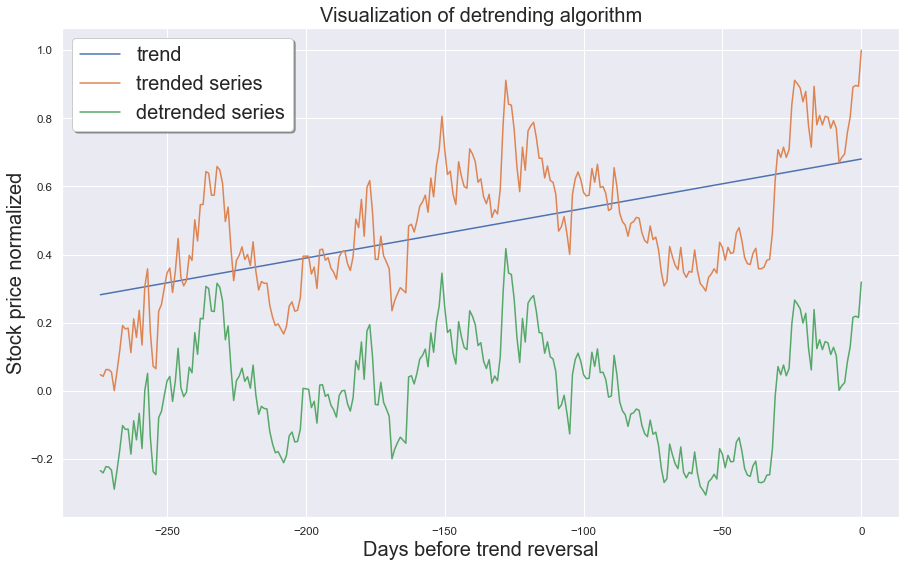

In [70]:
def detrend_flat(data_list):
    series = pd.Series(data_list)
    X = [i for i in range(0, len(series))]
    X = np.reshape(X, (len(X), 1))
    y = series.values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    x_plot = [-x for x in list(range(len(trend)))]
    sns.lineplot(x=x_plot,y=trend, label = 'trend').legend(shadow = True,fontsize = 20, facecolor = 'white')
    detrended = [y[i]-trend[i] for i in range(0, len(series))]
    return detrended


plt.title("Visualization of detrending algorithm", fontsize=20)
plt.ylabel("Stock price normalized", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)

df = pd.read_csv('data/test/part_0.csv')
df = df.drop(labels=['Ticker', 'index', 'Date'], axis=1)
df_temp = df.iloc[[342]]
df_temp = df_temp.dropna(axis=1)
series = df_temp.values.tolist()
series = list(np.array(series).flatten())
series_detrended = detrend_flat(series)
x_plot = [-x for x in list(range(len(series)))]
sns.lineplot(x=x_plot,y=series, label = 'trended series').legend(shadow = True,fontsize = 20, facecolor = 'white')
sns.lineplot(x=x_plot,y=series_detrended, label = 'detrended series').legend(shadow = True,fontsize = 20, facecolor = 'white')

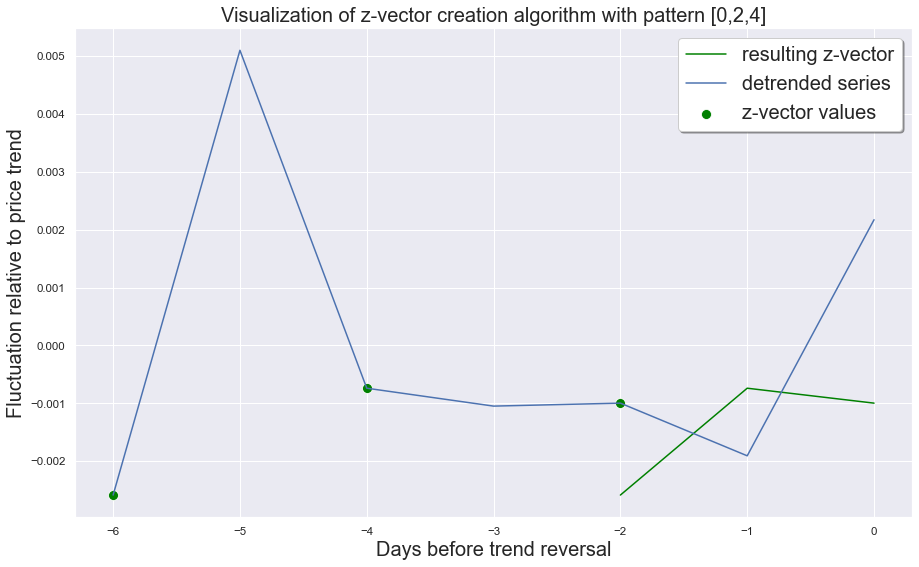

In [90]:
def make_z_vector_fixed(arr, pattern):
    z_vector = []
    for i in range(len(pattern)):
        z_vector.append(arr[pattern[i]])
    return z_vector

df = pd.read_csv('data/test/part_0.csv')
df = df.drop(labels=['Ticker', 'index', 'Date'], axis=1)
df_temp = df.iloc[[4234]]
key1 = -6 #the number of ticks we wish to observe - 1
key2 = min([int(x) for x in df_temp.columns[1:]])
df_temp = df_temp.drop(labels=[str(x) for x in list(range(key2,key1))], axis=1) #drop all ticks but those we're observing
df_temp = df_temp.dropna(axis=1)
series = df_temp.values.tolist()
series = list(np.array(series).flatten())
series_detrended = detrend_flat(series)[::-1]
z_vector = make_z_vector_fixed(series_detrended, [0,2,4])
x_plot = [-x for x in list(range(len(series_detrended)))]
x2_plot = [-x for x in list(range(len(z_vector)))]

plt.title("Visualization of z-vector creation algorithm with pattern [0,2,4]", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)

sns.scatterplot(x=[-6, -4, -2],y=z_vector, color='green', s=100, label = 'z-vector values').legend(shadow = True,fontsize = 20, facecolor = 'white')
sns.lineplot(x=[-2, -1, -0],y=z_vector, color='green', label = 'resulting z-vector').legend(shadow = True,fontsize = 20, facecolor = 'white')
sns.lineplot(x=x_plot,y=series_detrended[::-1], label = 'detrended series').legend(shadow = True,fontsize = 20, facecolor = 'white')

In [83]:
series_detrended

[-0.0025839710975725794,
 0.005099222893688693,
 -0.0007381440528479999,
 -0.0010473681172733507,
 -0.0009959053939375684,
 -0.0019057965319213555,
 0.0021719622998640498]

In [21]:
for legend in range(6):
    df = pd.read_csv('data/test/part_%s.csv' % str(legend))


    #extracting data
    df_temp = df.drop(labels=['Ticker', 'index', 'Date', 'extremum'], axis=1)
    key1 = -15
    key2 = min([int(x) for x in df_temp.columns])
    df_temp = df_temp.drop(labels=[str(x) for x in list(range(key2,key1))], axis=1)
    df_temp = df_temp.loc[df_temp.index < 4000]
    df_temp = df_temp.dropna(axis=0)
    clustering_data_trended = df_temp.values.tolist()
    clustering_data = detrend(clustering_data_trended)


    #creating z-functions for everything
    from functions_for_clustering import *
    clustering_data_z_optimized = []
    for i in clustering_data:
        clustering_data_z_optimized.append(generate_z_vector_best(i,(key1//-3)))
    len(clustering_data_z_optimized)


    clustering_result = get_clustering(clustering_data_z_optimized, 2, 1)


    visualization_data = []
    for i in range(len(clustering_result)):
        if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
            visualization_data.append(clustering_data[i])

    sns.set(rc={'figure.figsize':(20,7)})
    neighborhood = []
    visualization_index = list(range(len(clustering_data[0])))
    visualization_data_flat = np.array(visualization_data).flatten()
    visualization_index_flat = np.array(list(range(len(clustering_data[0])))*len(visualization_data)).flatten()
    for i in visualization_index:
        neighborhood.append(find_boundaries(visualization_data, visualization_data_flat, i))
    neighborhood = np.transpose(neighborhood)
    motif2 = [(neighborhood[0][x]+neighborhood[1][x])/2 for x in list(range(len(neighborhood[1])))]
    f = open('motif_%s.txt' % str(legend), 'w')
    f.write(' '.join(str(x) for x in neighborhood[1]))
    f.write('\n')
    f.write(' '.join(str(x) for x in motif2))
    f.write('\n')
    f.write(' '.join(str(x) for x in neighborhood[0]))
    f.close()
    print('motif_%s' % str(i), neighborhood[1])



C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:18: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


motif_14 [ 0.10041317  0.04147708 -0.01745902  0.00464202 -0.06166109 -0.00272499
 -0.09112914  0.04147708  0.04147708 -0.03219304  0.0562111   0.07094513
  0.07831214 -0.00272499 -0.03956005]


C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:18: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


motif_14 [ 0.00021643 -0.00800323  0.00021643  0.00843608  0.01665574  0.04953437
  0.04953437  0.03309505  0.01665574  0.00843608  0.01665574  0.00843608
  0.00843608  0.00021643 -0.00800323]


C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:18: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


motif_14 [ 0.01162491 -0.06525744  0.00064172 -0.08722383  0.01711651  0.02260811
  0.01711651  0.00613332  0.01162491  0.00064172  0.0390829  -0.03230786
  0.00064172 -0.05976584 -0.02681626]


C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:18: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


motif_14 [ 6.53478989e-03  3.26380788e-02 -2.60943212e-02  1.95864343e-02
 -7.17750767e-02  8.96767091e-06 -6.52492545e-02  2.61122566e-02
  5.87413676e-02 -1.95684990e-02  3.91639010e-02  3.91639010e-02
  5.87413676e-02 -3.26201434e-02 -1.95684990e-02]


C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:18: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


motif_14 [-0.02673662  0.00093552  0.01015957  0.04705576  0.01938362  0.00093552
  0.01938362  0.00093552  0.00093552  0.01015957  0.00093552 -0.03596067
  0.00093552  0.04705576  0.01015957]


C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
C:\Users\ivano\github_projects\BorovTech_TimeSeriesClustering\functions_for_clustering.py:18: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


motif_14 [-0.00708432 -0.00708432  0.01598145  0.01021501  0.01598145  0.05634655
  0.01021501  0.01021501  0.05634655  0.06211299  0.01021501  0.01598145
 -0.00708432 -0.04168297 -0.04168297]


In [ ]:

sns.lineplot(y=neighborhood[0], x=visualization_index)
sns.lineplot(y=neighborhood[1], x=visualization_index)
sns.lineplot(y=motif2, x=visualization_index)

In [19]:
f = open('motif_1', 'w')
f.write(' '.join(str(x) for x in neighborhood[1]))
f.write('\n')
f.write(' '.join(str(x) for x in motif2))
f.write('\n')
f.write(' '.join(str(x) for x in neighborhood[0]))
f.close()

In [17]:
f = open('motif_1', 'w')
f.write('qwe')
f.close()

In [11]:
' '.join(str(x) for x in neighborhood[1])

'0.10041317286857299 0.041477077370002946 -0.017459018128567094 0.004642017683396671 -0.061661089752494624 -0.002724994253924584 -0.09112913750177964 0.041477077370002946 0.041477077370002946 -0.032193042003209604 0.056211101244645456 0.07094512511928797 0.07831213705660922 -0.002724994253924584 -0.03956005394053086'

<AxesSubplot:>

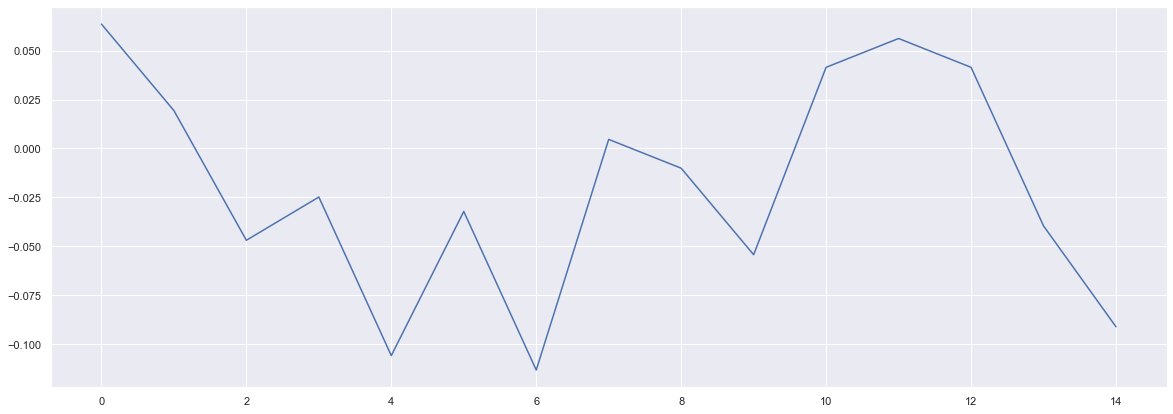

In [6]:
sns.lineplot(y=neighborhood[0], x=visualization_index)

In [7]:
    df = pd.read_csv('data/test/part_0.csv')
    #extracting data
    df_temp = df.drop(labels=['Ticker', 'index', 'Date', 'extremum'], axis=1)
    key1 = -15 #the number of ticks we wish to observe
    key2 = min([int(x) for x in df_temp.columns])
    df_temp = df_temp.drop(labels=[str(x) for x in list(range(key2,key1))], axis=1) #drop all ticks but those we're observing
    df_temp = df_temp.dropna(axis=0) #drop rows with nan
    clustering_data_trended = df_temp.values.tolist() #convert resulting data to list
    clustering_data = detrend(clustering_data_trended) #detrend resulting data

    len(clustering_data)   

10848

In [18]:
    #creating z-functions for everything
    cdzo = [generate_z_vector_best(x,(key1//-3)) for x in clustering_data] 
    # cdzo = clustering_data_z_optimized
    clustering_result = get_clustering(cdzo, 2, 1)

In [4]:
motif1 = [[0.10041317286857299, 0.0488440893073242, -0.017459018128567094, 0.004642017683396671, -0.06902810168981588, 0.012009029620717926, -0.06902810168981588, 0.041477077370002946, 0.041477077370002946, -0.032193042003209604, 0.07094512511928797, 0.08567914899393048, 0.07094512511928797, -0.002724994253924584, -0.046927065877852114],[0.0488440893073242, 0.004642017683396671, -0.061661089752494624, -0.02482603006588835, -0.10586316137642215, -0.032193042003209604, -0.14269822106302843, 0.012009029620717926, -0.002724994253924584, -0.05429407781517337, 0.041477077370002946, 0.056211101244645456, 0.041477077370002946, -0.032193042003209604, -0.0984961494391009]]
type_1_errors = 0 # найден мотив, а точки смены тренда нет
type_2_errors = 0 # точке смены тренда не предшествовал мотив
hits = 0

# прикладывание
df = pd.read_csv('data/test/part_0.csv')
df = df.drop(labels=['Ticker', 'index', 'Date'], axis=1)
for i in df.index:
    df_temp = df.iloc[[i]]
    df_temp = df_temp.dropna(axis=1)
    series = df_temp.values.tolist()
    if series[0]:
        series = detrend(series)
        series = list(np.array(series).flatten())
        m_len = len(motif1[0])

        # type 1
        for trans in range(1,len(series) - m_len): # trans is a pointer, determining what number we transpose the прикладывание by
            chunk = series[trans:trans+m_len]
            is_motif = True
            for p in range(m_len): # мы приложили мотив к chunk начинающемуся с trans, теперь проходимся по точкам chunk и проверяем, попадают ли они в мотив
                if not motif1[1][p] <= chunk[p] <= motif1[0][p]:
                    is_motif = False
                    break
            if is_motif:
                type_1_errors += 1

        # type 2
        trans = 0
        chunk = series[trans:trans+m_len]
        is_motif = True
        for p in range(m_len):
            if not motif1[1][p] <= chunk[p] <= motif1[0][p]:
                is_motif = False
                break
        if is_motif:
            hits += 1
        else:
            type_2_errors += 1

print("Type 1: ", type_1_errors)
print("Type 2: ", type_2_errors)
print("Hits: ", hits)

Type 1:  0
Type 2:  11151
Hits:  0


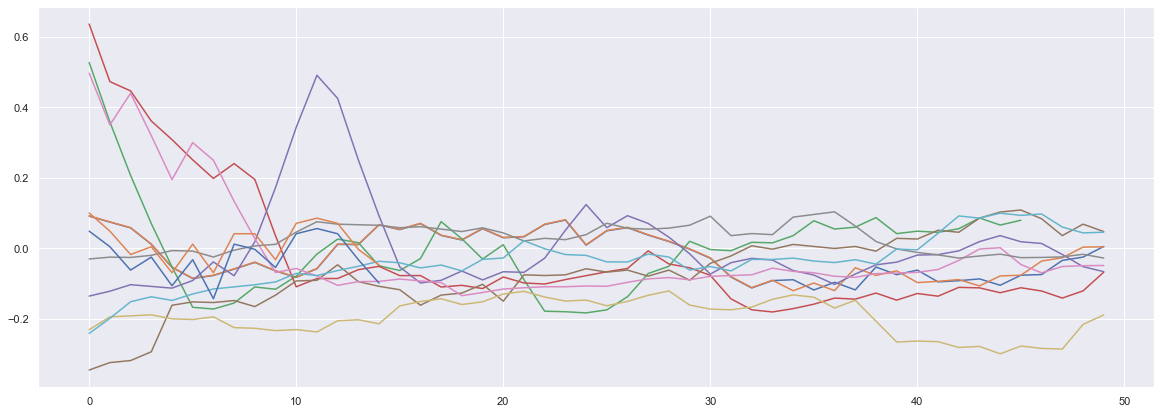

In [11]:
sns.set(rc={'figure.figsize':(20,7)})
df = pd.read_csv('data/test/part_0.csv')
df = df.drop(labels=['Ticker', 'index', 'Date'], axis=1)
for i in range(10):
    df_temp = df.iloc[[i]]
    df_temp = df_temp.dropna(axis=1)
    series = df_temp.values.tolist()
    series = detrend(series)
    series = list(np.array(series).flatten())

    sns.lineplot(list(range(len(series)))[:50], series[:50])

sns.lineplot(list(range(len(motif1[1]))), motif1[1])
sns.lineplot(list(range(len(motif1[1]))), motif1[0])

In [17]:
df = pd.read_csv('data/test/part_0.csv')
df = df.drop(labels=['Ticker', 'index', 'Date', 'extremum'], axis=1)
df_temp = df.iloc[[0]]
df_temp = df_temp.dropna(axis=1)
series = df_temp.values.tolist()
if series[0]:
    series = detrend(series)
    series = list(np.array(series).flatten())
    m_len = len(motif1)

1


In [3]:
def small_patterns(arr):
    #if arr[i + 1] > arr[i] -> 1
    #else 0
    output = []
    for i in range(len(arr)-1):
        if arr[i + 1] >= arr[i]:
            output.append(1)
        else:
            output.append(0)
    return output

In [4]:
def check_directions(motif, series_window):
    if small_patterns(motif) == small_patterns(series_window):
        return True
    else:
        return False

In [5]:
def check_boundaries(up, low, series_window):
    for p in range(len(series_window)): 
        if not (low[p] <= series_window[p] <= up[p]):
            return False
    return True

In [108]:
f = open("motifs/motifs_7_3/thamotifs012.txt", "r")
line = f.readline()
diff = []
for _ in range(100):
    line = f.readline()
    arr = list(map(float, line.split(",")))
    diff.append(abs(max(arr))+abs(min(arr)))
f.close()
diff.sort()

0.009150911776405576
0.01226756474696216


<AxesSubplot:>

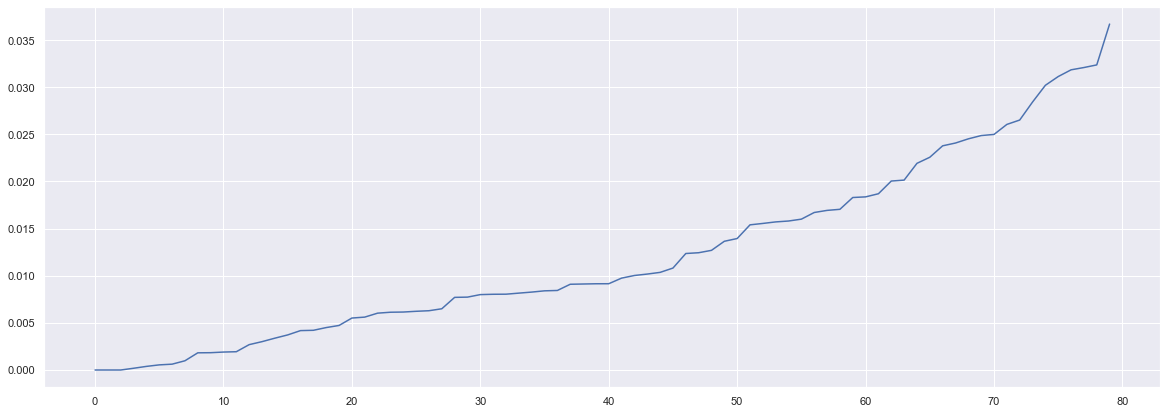

In [110]:
print(np.median(diff[:80]))
print(np.mean(diff[:80]))
sns.lineplot(x=list(range(len(diff[:80]))), y=diff[:80])

[0, 0, 1, 1, 0, 1]


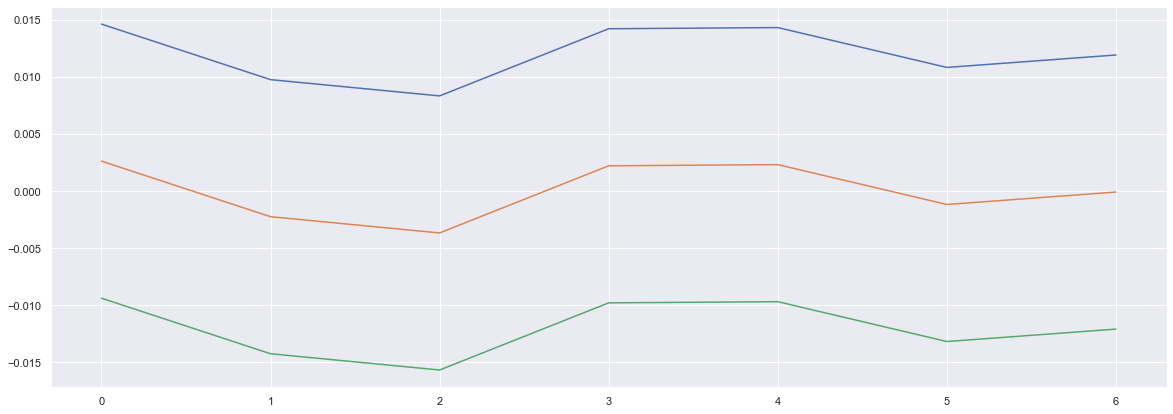

In [6]:
f = open("motifs/motifs_7_3/thamotifs012.txt", "r")
for _ in range(10):
    line = f.readline()
f.close()

arr = list(map(float, line.split(",")))
margin = 0.012
upper = [margin + x for x in arr]
lower = [-margin + x for x in arr]
motif1 = {'up': upper, 'motif': arr, 'low': lower} # up - upper_boundary, low - lower_boundary
print(small_patterns(arr))
sns.set(rc={'figure.figsize':(20,7)})
sns.lineplot(x=list(range(len(motif1['motif']))), y=motif1['up'])
sns.lineplot(x=list(range(len(motif1['motif']))), y=motif1['motif'])
sns.lineplot(x=list(range(len(motif1['motif']))), y=motif1['low'])

In [114]:
motif1 = {'up': upper, 'motif': arr, 'low': lower}
# motif1 = [[0.10041317286857299, 0.0488440893073242, -0.017459018128567094, 0.004642017683396671, -0.06902810168981588, 0.012009029620717926, -0.06902810168981588, 0.041477077370002946, 0.041477077370002946, -0.032193042003209604, 0.07094512511928797, 0.08567914899393048, 0.07094512511928797, -0.002724994253924584, -0.046927065877852114],[0.0488440893073242, 0.004642017683396671, -0.061661089752494624, -0.02482603006588835, -0.10586316137642215, -0.032193042003209604, -0.14269822106302843, 0.012009029620717926, -0.002724994253924584, -0.05429407781517337, 0.041477077370002946, 0.056211101244645456, 0.041477077370002946, -0.032193042003209604, -0.0984961494391009]]

type_1_errors = 0 # найден мотив, а точки смены тренда нет
type_2_errors = 0 # точке смены тренда не предшествовал мотив
hits = 0

window_len = len(motif1['motif']) #m_len

for legend in range(6):
    df = pd.read_csv('data/test/part_%s.csv' % str(legend))
    df = df.drop(labels=['Ticker', 'index', 'Date'], axis=1)
    for i in df.index:
        df_temp = df.iloc[[i]]
        df_temp = df_temp.dropna(axis=1)
        series = df_temp.values.tolist()
        if len(series[0]) >= 7:
            series = detrend(series)
            series = list(np.array(series).flatten())
            series = series[::-1]
            
            # type 1
            for transposition in range(0, len(series) - window_len - 1):
                # transposition is a pointer, determining what number we transpose the window by
                window = series[transposition:transposition + window_len]
                # мы приложили мотив к window начинающемуся с transposition, 
                # теперь проходимся по точкам window и проверяем, попадают ли они под мотив
                if check_directions(motif1['motif'], window) and check_boundaries(motif1['up'], motif1['low'], window):
                    type_1_errors += 1


            # type 2 
            transposition = len(series) - window_len
            window = series[transposition:transposition + window_len]
            if check_directions(motif1['motif'], window) and check_boundaries(motif1['up'], motif1['low'], window):
                hits += 1
            else:
                type_2_errors += 1

print("Type 1: ", type_1_errors)
print("Type 2: ", type_2_errors)
print("Hits: ", hits)
print("Ratio: ", hits/type_1_errors)


Type 1:  1759
Hits:  14
Ratio:  0.007959067652075043


0.05 - 
Type 1:  6641
Type 2:  10911
Hits:  28
Ratio:  0.004216232495106159

0.03 - 
Type 1:  2455
Type 2:  10924
Hits:  15
Ratio:  0.006109979633401222

0.02 - 
Type 1:  3692
Type 2:  65384
Hits:  19
Ratio:  0.0051462621885157095

0.015 -
Type 1:  367
Type 2:  10938
Hits:  1
Ratio:  0.0027247956403269754

0.01 - 
Type 1:  85
Type 2:  10938
Hits:  1
Ratio:  0.011764705882352941

0.005 - 
Type 1:  3
Type 2:  10939
Hits:  0
Ratio:  0.0

0.02 - 
Type 1:  1409
Type 2:  10937
Hits:  2
Ratio:  0.0014194464158978

0.01 - 
Type 1:  201
Type 2:  10938
Hits:  1
Ratio:  0.004975124378109453

0.005 - 
Type 1:  7
Type 2:  10939
Hits:  0
Ratio:  0.0

In [151]:
import pandas as pd


def assesment_out(filename, assesment, code):
    ot_f = open(filename, code)
    ot_f.write('\n')
    ot_f.write(', '.join(map(str, motif1['motif'])))
    ot_f.write('\n')
    ot_f.write('type_1_errors: ')
    ot_f.write(str(assesment['type_1_errors']))
    ot_f.write(' ; type_2_errors: ')
    ot_f.write(str(assesment['type_2_errors']))
    ot_f.write('; hits: ')
    ot_f.write(str(assesment['hits']))
    ot_f.write(' ; ratio: ')
    ot_f.write(str(assesment['ratio']))
    ot_f.close()

    
def motif_assesment(motif1):
    # motif1 = {'up': upper, 'motif': arr, 'low': lower}

    type_1_errors = 0 # найден мотив, а точки смены тренда нет
    type_2_errors = 0 # точке смены тренда не предшествовал мотив
    hits = 0

    window_len = len(motif1['motif']) #m_len

    for legend in range(1):
        df = pd.read_csv('data/test/part_%s.csv' % str(legend))
        df = df.drop(labels=['Ticker', 'index', 'Date'], axis=1)
        for i in df.index:
            df_temp = df.iloc[[i]]
            df_temp = df_temp.dropna(axis=1)
            series = df_temp.values.tolist()
            if len(series[0]) >= window_len:
                series = detrend(series)
                series = list(np.array(series).flatten())
                series = series[::-1]

                # type 1
                for transposition in range(0, len(series) - window_len - 1):
                    # transposition is a pointer, determining what number we transpose the window by
                    window = series[transposition:transposition + window_len]
                    # мы приложили мотив к window начинающемуся с transposition, 
                    # теперь проходимся по точкам window и проверяем, попадают ли они под мотив
                    if check_directions(motif1['motif'], window) and check_boundaries(motif1['up'], motif1['low'], window):
                        type_1_errors += 1


                # type 2 
                transposition = len(series) - window_len
                window = series[transposition:transposition + window_len]
                if check_directions(motif1['motif'], window) and check_boundaries(motif1['up'], motif1['low'], window):
                    hits += 1
                else:
                    type_2_errors += 1
    
    if type_1_errors == 0 and hits > 0:
        ratio = float("inf")
    elif type_1_errors == 0:
        ratio = 0
    else:
        ratio =  hits/type_1_errors # the more the ratio the more succesful the motif
    
    assesment = {'type_1_errors':type_1_errors,
                'type_2_errors':type_2_errors,
                'hits':hits,
                'ratio':ratio}
    assesment_out('motifs_report.txt', assesment, 'a')
    
    return assesment



patterns_for_supercomp=[]
fi = open("patterns/patterns_supercomp_7.txt", "r")
for line in fi:
    temp = list(map(int, line.split(", ")))
    patterns_for_supercomp.append(temp)
fi.close()

basic_assesment = {'type_1_errors':0,
                'type_2_errors':0,
                'hits':0,
                'ratio':0}
best_10_assesments = [basic_assesment]*10

for pattern in patterns_for_supercomp[0:1]:
    f = open('motifs/motifs_7_3/thamotifs%s.txt' % ''.join(map(str, pattern)), 'r')
    f.readline()
    for line in f:
        current_motif = list(map(float, line.split(", ")))
        margin = 0.012
        upper = [margin + x for x in current_motif]
        lower = [-margin + x for x in current_motif]
        motif1 = {'up': upper, 'motif': current_motif, 'low': lower} # up - upper_boundary, low - lower_boundary
        current_assesment = motif_assesment(motif1)
        best_10_assesments.append(current_assesment)
        best_10_assesments.sort(key=lambda x: x['ratio'])
        del best_10_assesments[0]
    f.close()

for assesment in best_10_assesments:
    assesment_out('motifs_report_best.txt', assesment, 'w')


KeyboardInterrupt: 

In [ ]:
from collections import defaultdict
import numpy as np
from itertools import product
from scipy.special import gamma
from scipy.spatial.distance import pdist, squareform, euclidean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from sklearn.linear_model import LinearRegression
import math
from functions_for_clustering import *
import threading


def assesment_out(filename, assesment, code):
    ot_f = open(filename, code)
    ot_f.write('\n')
    ot_f.write(', '.join(map(str, assesment['motif'])))
    ot_f.write('\n')
    ot_f.write('type_1_errors: ')
    ot_f.write(str(assesment['type_1_errors']))
    ot_f.write(' ; type_2_errors: ')
    ot_f.write(str(assesment['type_2_errors']))
    ot_f.write(' ; hits: ')
    ot_f.write(str(assesment['hits']))
    ot_f.write(' ; ratio: ')
    ot_f.write(str(assesment['ratio']))
    ot_f.close()

def small_patterns(arr):
    #if arr[i + 1] > arr[i] -> 1
    #else 0
    output = []
    for i in range(len(arr)-1):
        if arr[i + 1] >= arr[i]:
            output.append(1)
        else:
            output.append(0)
    return output

def check_directions(motif, series_window):
    if small_patterns(motif) == small_patterns(series_window):
        return True
    else:
        return False
    
def check_boundaries_euclidean(motif, series_window, EPS=0.05):
    dist = euclidean(motif, series_window)
    if dist < EPS:
        return True
    return False
    
def motif_assesment(motif1):

    type_1_errors = 0 # найден мотив, а точки смены тренда нет
    type_2_errors = 0 # точке смены тренда не предшествовал мотив
    hits = 0

    window_len = len(motif1) #m_len

    for legend in range(6):
        df = pd.read_csv('data/test/part_%s.csv' % str(legend))
        df = df.drop(labels=['Ticker', 'index', 'Date'], axis=1)
        for i in df.index:
            df_temp = df.iloc[[i]]
            df_temp = df_temp.dropna(axis=1)
            series = df_temp.values.tolist()
            if len(series[0]) >= window_len:
                series = detrend(series)
                series = list(np.array(series).flatten())
                series = series[::-1]

                # type 1
                for transposition in range(0, len(series) - window_len - 1):
                    # transposition is a pointer, determining what number we transpose the window by
                    window = series[transposition:transposition + window_len]
                    # мы приложили мотив к window начинающемуся с transposition, 
                    # теперь проходимся по точкам window и проверяем, попадают ли они под мотив
                    if check_directions(motif1, window) and check_boundaries_euclidean(motif1, window):
                        type_1_errors += 1


                # type 2 
                transposition = len(series) - window_len
                window = series[transposition:transposition + window_len]
                if check_directions(motif1, window) and check_boundaries_euclidean(motif1, window):
                    hits += 1
                else:
                    type_2_errors += 1
                    
    if type_1_errors == 0 and hits != 0:
        ratio = float("inf")
    elif type_1_errors == 0:
        ratio = 0
    else:
        ratio =  hits/type_1_errors # the more the ratio the more succesful the motif
    
    assesment = {'type_1_errors':type_1_errors,
                'type_2_errors':type_2_errors,
                'hits':hits,
                'ratio':ratio,
                'motif':motif1}
    
    return assesment


def assesment_duckery(pattern):
    print("opened ", 'thamotifs%s.txt' % ''.join(map(str, pattern)))
    f = open('motifs/motifs_7_3/thamotifs%s.txt' % ''.join(map(str, pattern)), 'r')
    f.readline()
    for line in f:
        current_motif = list(map(float, line.split(", "))) # up - upper_boundary, low - lower_boundary
        current_assesment = motif_assesment(current_motif)
        print("assesed", 'motifs_report_euc%s.txt' % ''.join(map(str, pattern)), current_assesment['ratio'])
        assesment_out('motifs_report_euc%s.txt' % ''.join(map(str, pattern)), current_assesment, 'a')
    f.close()
    


patterns_for_supercomp=[]
fi = open("patterns/patterns_supercomp_7.txt", "r")
for line in fi:
    temp = list(map(int, line.split(", ")))
    patterns_for_supercomp.append(temp)
fi.close()
     
threads = [threading.Thread(target=assesment_duckery, args=[x]) for x in patterns_for_supercomp[:24]]

for i in threads:
    i.start()
    
for i in threads:
    i.join()


opened  thamotifs012.txt
opened  opened  thamotifs014.txt
thamotifs013.txtopened 
 thamotifs015.txt
opened  thamotifs016.txt
opened  thamotifs023.txtopened  thamotifs024.txt

opened  thamotifs025.txt
opened  thamotifs026.txt
opened  thamotifs034.txt
opened  thamotifs035.txt
opened  thamotifs036.txt
opened  thamotifs045.txt
opened  thamotifs046.txt
opened  thamotifs056.txt
opened  thamotifs123.txt
opened  thamotifs124.txtopened  thamotifs125.txt

opened  thamotifs126.txt
opened  opened thamotifs134.txt
 thamotifs135.txt
opened  thamotifs136.txt
opened  thamotifs145.txt
opened  thamotifs146.txt


In [4]:
sns.set(rc={'figure.figsize':(15,9)})
sns.set(font_scale=1.05)

<AxesSubplot:title={'center':'The “best” motif - 40.7% likely to be a sign of a reversing trend '}, xlabel='Days before trend reversal', ylabel='Fluctuation relative to price trend'>

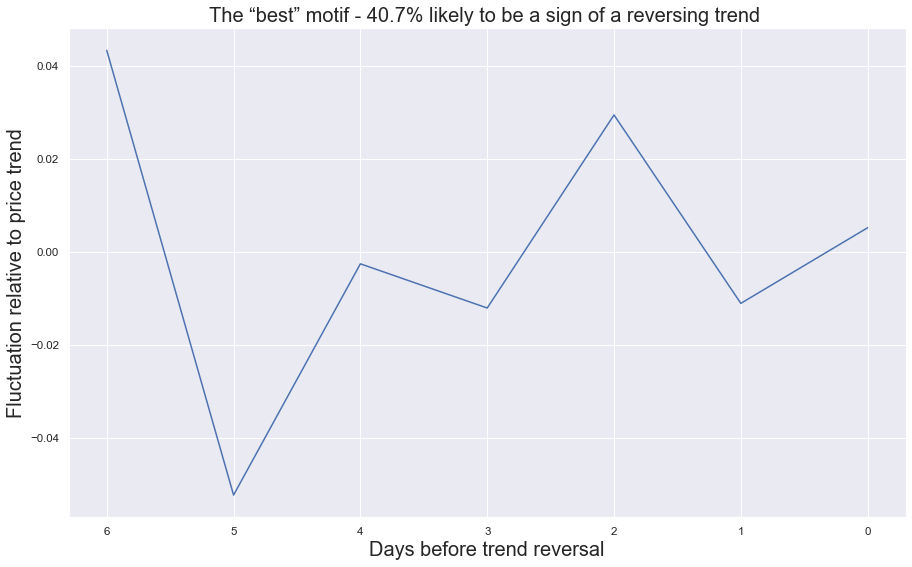

In [6]:
a=[0.04326661382864386,
   -0.05219169704939639,
   -0.002559443581860041,
   -0.01204702327887493,
   0.029392349609203852,
   -0.011047052779223607,
   0.00518625325150738]
plt.title("The “best” motif - 40.7% likely to be a sign of a reversing trend ", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)
b = ["6",'5','4','3','2',"1",'0']
sns.lineplot(x=b, y=a)

<AxesSubplot:title={'center':'Appendix 2.1\nMotif that is 0% likely to be a sign of a reversing trend according to data used'}, xlabel='Days before trend reversal', ylabel='Fluctuation relative to price trend'>

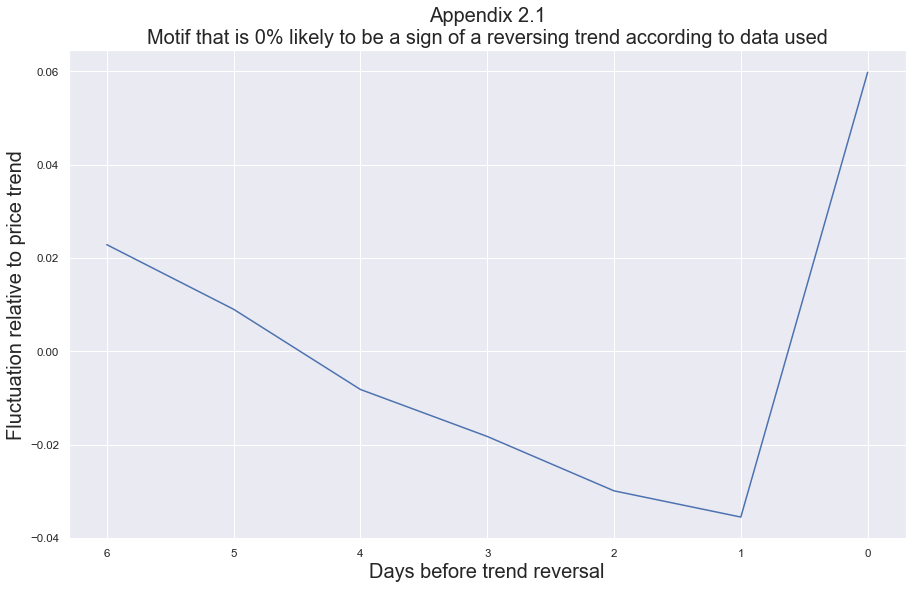

In [14]:
a = [0.022881043371263773, 
     0.009039156277295107, 
     -0.00814785735205894, 
     -0.018216359379389587, 
     -0.029874770104833453, 
     -0.035491993857986785, 
     0.0598107810457099]
plt.title("Appendix 2.1\nMotif that is 0% likely to be a sign of a reversing trend according to data used", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)
b = ["6",'5','4','3','2',"1",'0']
sns.lineplot(x=b, y=a)

<AxesSubplot:title={'center':'Motif that is 0% likely to be a sign of a reversing trend according to data used'}, xlabel='Days before trend reversal', ylabel='Fluctuation relative to price trend'>

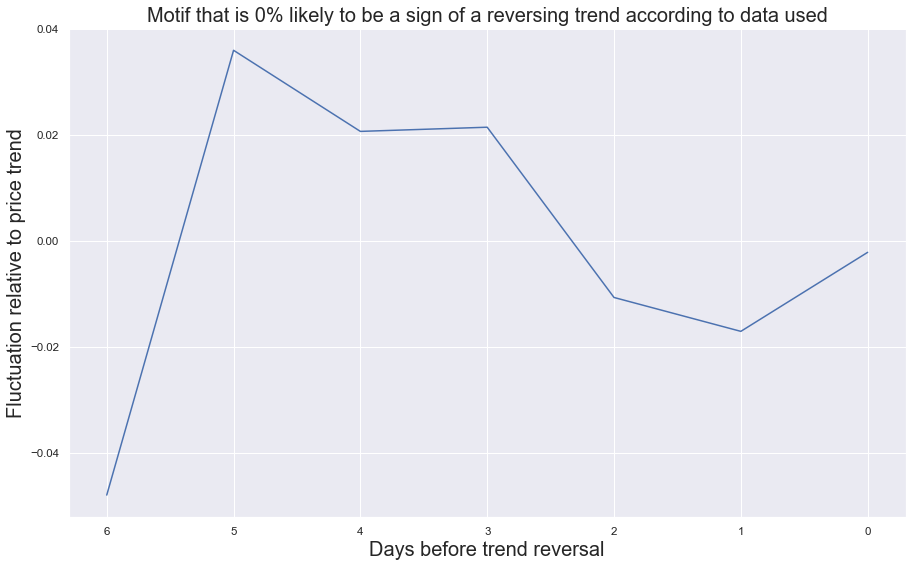

In [7]:
a = [-0.04803421040940659, 
     0.035966924026921865, 
     0.020650093529179552, 
     0.021439616717287183, 
     -0.010716699006036518, 
     -0.017115183934676436, 
     -0.0021905409232690267]
plt.title("Motif that is 0% likely to be a sign of a reversing trend according to data used", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)
b = ["6",'5','4','3','2',"1",'0']
sns.lineplot(x=b, y=a)

<AxesSubplot:title={'center':'Appendix 2.3\nMotif that is 0% likely to be a sign of a reversing trend according to data used'}, xlabel='Days before trend reversal', ylabel='Fluctuation relative to price trend'>

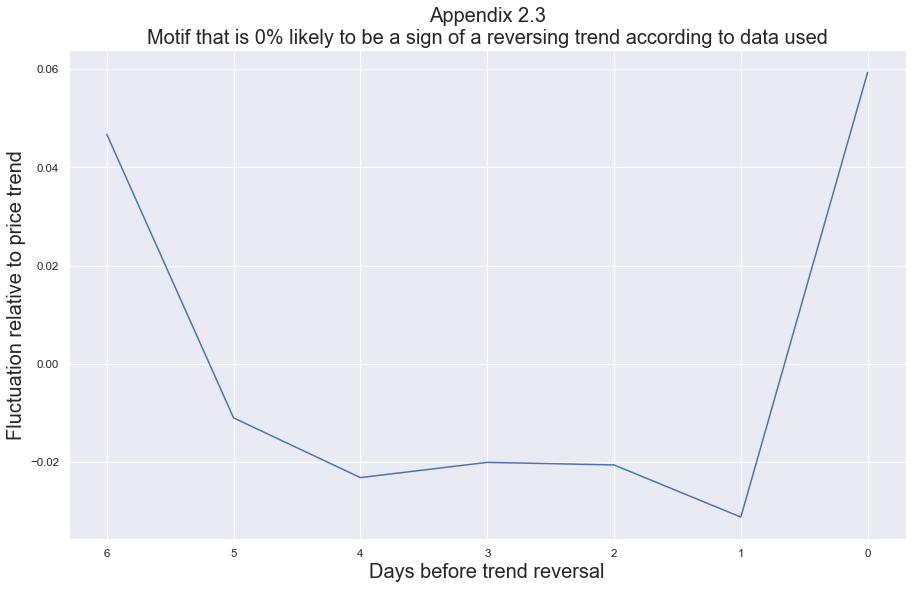

In [20]:
a = [0.04676260744475094, 
     -0.011022187274801983, 
     -0.02318957734333682, 
     -0.020085770306124625, 
     -0.020610734625283473, 
     -0.03122761875220822, 
     0.059373280857004024]

plt.title("Appendix 2.3\nMotif that is 0% likely to be a sign of a reversing trend according to data used", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)
b = ["6",'5','4','3','2',"1",'0']
sns.lineplot(x=b, y=a)

<AxesSubplot:title={'center':'Appendix 2.4\nMotif that is 0% likely to be a sign of a reversing trend according to data used'}, xlabel='Days before trend reversal', ylabel='Fluctuation relative to price trend'>

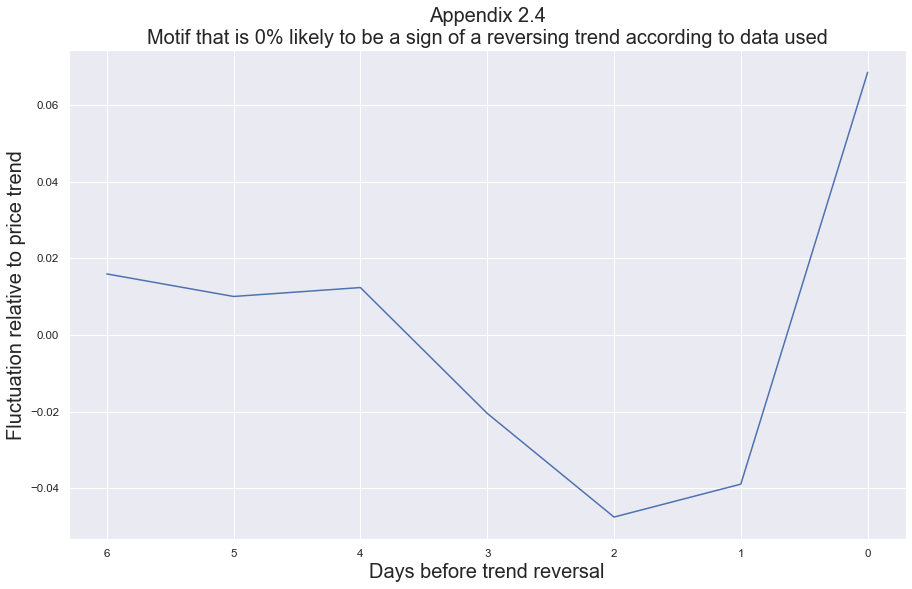

In [24]:
a = [0.01593424182848399, 
     0.010049612905827425, 
     0.012373739657941378, 
     -0.020452845577536384, 
     -0.04752811165507247, 
     -0.03893371408905306, 
     0.06855707692940895]
plt.title("Appendix 2.4\nMotif that is 0% likely to be a sign of a reversing trend according to data used", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)
b = ["6",'5','4','3','2',"1",'0']
sns.lineplot(x=b, y=a)

<AxesSubplot:title={'center':'Appendix 3.1\nMotif that is less than 0.2% likely to be a sign of a reversing trend according to data used'}, xlabel='Days before trend reversal', ylabel='Fluctuation relative to price trend'>

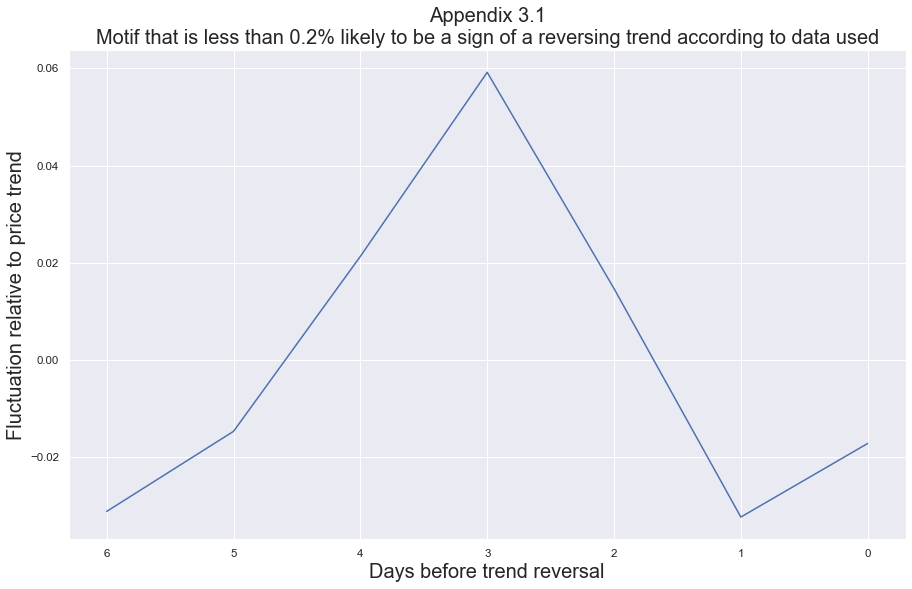

In [33]:
a = [-0.031113775239809866, 
     -0.014649527746277695, 
     0.021329093423634652, 
     0.05916567882228283, 
     0.014698353136011361, 
     -0.03227982626316217, 
     -0.017149996132679087]

plt.title("Appendix 3.1\nMotif that is less than 0.2% likely to be a sign of a reversing trend according to data used", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)
b = ["6",'5','4','3','2',"1",'0']
sns.lineplot(x=b, y=a)

<AxesSubplot:title={'center':'Appendix 3.2\nMotif that is less than 0.2% likely to be a sign of a reversing trend according to data used'}, xlabel='Days before trend reversal', ylabel='Fluctuation relative to price trend'>

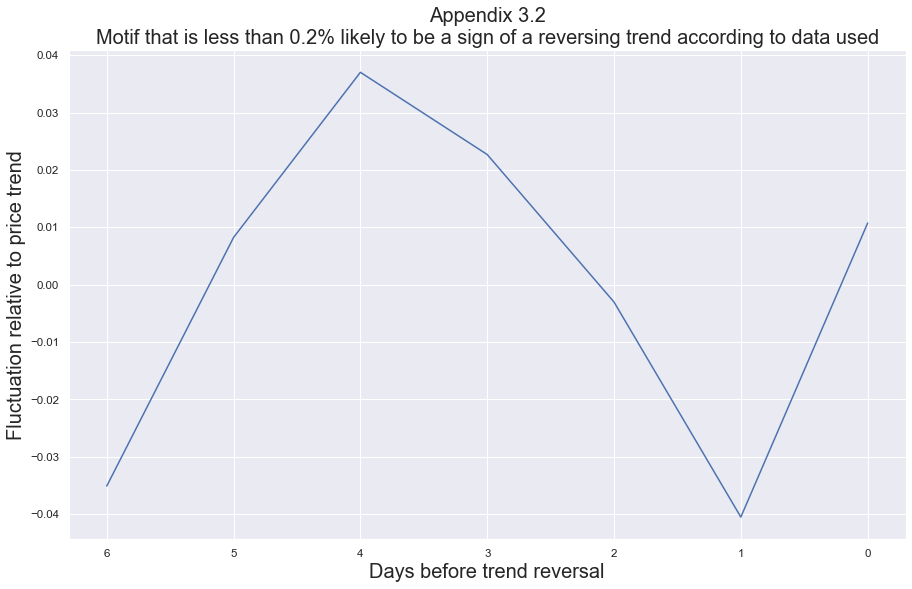

In [32]:
a = [-0.035111569786546976, 
     0.008226354272648794, 
     0.03701698830679746, 
     0.02268435745387656, 
     -0.0030336955379251756, 
     -0.04051598715693135, 
     0.010733552448080705]

plt.title("Appendix 3.2\nMotif that is less than 0.2% likely to be a sign of a reversing trend according to data used", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)
b = ["6",'5','4','3','2',"1",'0']
sns.lineplot(x=b, y=a)

<AxesSubplot:title={'center':'Appendix 3.3\nMotif that is less than 0.2% likely to be a sign of a reversing trend according to data used'}, xlabel='Days before trend reversal', ylabel='Fluctuation relative to price trend'>

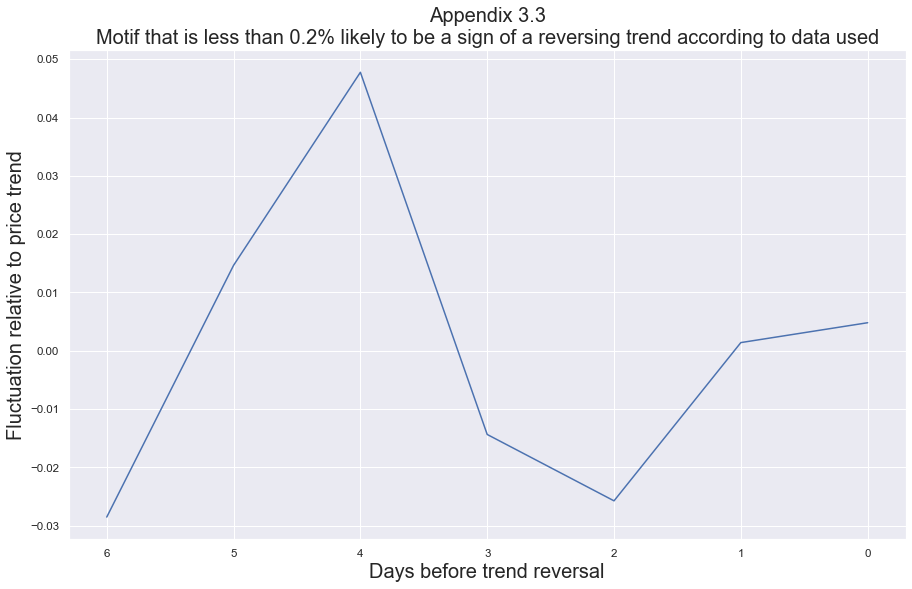

In [31]:
a =[-0.028519270111365375, 
    0.01464568955087792, 
    0.04775455816148456, 
    -0.01435288442204583, 
    -0.02573692810344363, 
    0.0014014497408893223, 
    0.004807385183603079]

plt.title("Appendix 3.3\nMotif that is less than 0.2% likely to be a sign of a reversing trend according to data used", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)
b = ["6",'5','4','3','2',"1",'0']
sns.lineplot(x=b, y=a)

<AxesSubplot:title={'center':'Motif that is less than 0.2% likely to be a sign of a reversing trend according to data used'}, xlabel='Days before trend reversal', ylabel='Fluctuation relative to price trend'>

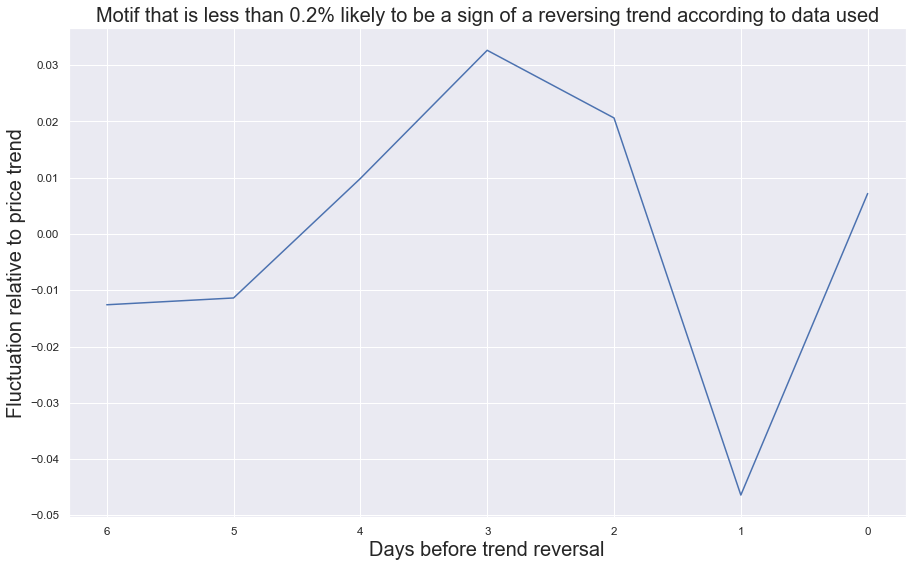

In [8]:
a = [-0.012576666777374786, 
     -0.011367481451409372, 
     0.00987141366192528, 
     0.03265267474751711, 
     0.02062682612200316, 
     -0.04639992321296293, 
     0.007193156910301701]

plt.title("Motif that is less than 0.2% likely to be a sign of a reversing trend according to data used", fontsize=20)
plt.ylabel("Fluctuation relative to price trend", fontsize=20)
plt.xlabel("Days before trend reversal", fontsize=20)
b = ["6",'5','4','3','2',"1",'0']
sns.lineplot(x=b, y=a)